In [164]:
import numpy as np
import matplotlib
# matplotlib.use('Agg') # 表示しないモード。バッチ処理する場合、画像表示が多くなりすぎて　notebooke の制限で途中で止まってしまう。
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image
import math
import pandas as pd

from sympy import *
from sympy.abc import a,b,c
from sympy import diff,Symbol,Matrix,symbols,solve,simplify,binomial
# init_session()


from sympy import var
from rdlib2 import *

import datetime
import time
import sys
import os

# バッチ司令ファイルの読み込み
# df = pd.read_excel('自動計測データ.xlsx')
# df = pd.read_csv('画像リストUTF8.csv', sep=',')
# df.head(5)

In [165]:
px = [var('px'+str(i)) for i in range(8)]
py = [var('py'+str(i)) for i in range(8)]

t = symbols('t')
datafile = '仕様テスト用.xlsx'
df = pd.read_excel(datafile)

In [311]:
SPX,SPY=[],[]
for i in range(8):
    px[i]=df.iloc[7]['SPX'+str(i)]
    py[i]=df.iloc[7]['SPY'+str(i)]
        
v = 1-t
bezX,bezY = 0,0
for i in range(8):
    bezX = bezX + binomial(7,i)*v**(7-i)*t**i*px[i]
    bezY = bezY + binomial(7,i)*v**(7-i)*t**i*py[i]

In [312]:
bezX,bezY

(10.5118980208143*t**7 + 30.0539511307999*t**6*(-7*t + 7) + 1704.5989529664*t**5*(-t + 1)**2 + 978.238773436995*t**4*(-t + 1)**3 + 5138.13562429359*t**3*(-t + 1)**4 - 205.526460014574*t**2*(-t + 1)**5 + 465.869848779175*t*(-t + 1)**6 + 7.56637297521078*(-t + 1)**7,
 249.000868415676*t**7 + 214.34484409183*t**6*(-7*t + 7) + 4015.43360489617*t**5*(-t + 1)**2 + 5140.31437608885*t**4*(-t + 1)**3 + 2772.63764332266*t**3*(-t + 1)**4 + 1936.65819124685*t**2*(-t + 1)**5 + 43.83009251327*t*(-t + 1)**6 + 1.5*(-t + 1)**7)

In [313]:
samplesX = [bezX.subs(t,s) for s in np.linspace(0,1,101)]
samplesY = [bezY.subs(t,s) for s in np.linspace(0,1,101)]

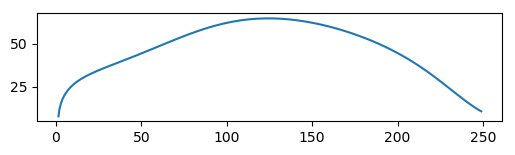

In [314]:
    plt.figure(figsize=(6,6),dpi=100)
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.gca().invert_yaxis() 
    plt.plot(samplesY,samplesX)

In [315]:
#幅の一定さをもとめる
#肥大部の面積を出す
samplesX_min_in = np.argmin(samplesX)
samplesX_min = samplesX[samplesX_min_in]
#肥大部の半分の面積を出す
menseki = 0
for i in range(len(samplesX)):
    menseki += samplesX[i]
#肥大部の外接四角の面積を出す
samplesX_max_in = np.argmax(samplesX)
samplesX_max = samplesX[samplesX_max_in]
gaisetu = (samplesX_max)*len(samplesX)
ittei = menseki/gaisetu
print(ittei)
print(samplesX_min)


0.688997510463269
7.56637297521078


0.000828652192736629


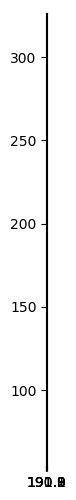

In [316]:
#中心線の抽出
cx = [var('cx'+str(i)) for i in range(4)]
cy = [var('cy'+str(i)) for i in range(4)]
CPX,CPY=[],[]
for i in range(4):
    cx[i]=df.iloc[7]['CPX'+str(i)]
    cy[i]=df.iloc[7]['CPY'+str(i)]
        
v = 1-t
bezcX,bezcY = 0,0
for i in range(4):
    bezcX = bezcX + binomial(3,i)*v**(3-i)*t**i*cx[i]
    bezcY = bezcY + binomial(3,i)*v**(3-i)*t**i*cy[i]
    
centX = [bezcX.subs(t,s) for s in np.linspace(0,1,101)]
centY = [bezcY.subs(t,s) for s in np.linspace(0,1,101)]

plt.figure(figsize=(6,6),dpi=100)
plt.gca().set_aspect('equal', adjustable='box')
#plt.gca().invert_yaxis() 
plt.plot(centX,centY)

from decimal import Decimal 
#先端同士を繋げた直線からの中点の距離
#中心点から直線の距離を求める
#a(Xmin, Ymin), b(Xmax, Ymax), c(Xcen, Ycen)
Ymax_in = np.argmax(centY)
Ymin_in = np.argmin(centY)
Ymax = centY[Ymax_in]
Ymin = centY[Ymin_in]
Xmax = centX[Ymax_in]
Xmin = centX[Ymin_in]
Ycen_atai = (Ymax - Ymin)/2 + Ymin
ar_centY = np.array(centY)
Ycen_in = np.argmin((ar_centY - Ycen_atai)**2)
Ycen = centY[Ycen_in]
Xcen = centX[Ycen_in]
u = np.array([round(Xmax - Xmin, 5), round(Ymax - Ymin, 5)])#直線のベクトル
v = np.array([round(Xcen - Xmin, 5), round(Ycen - Ymin, 5)]) #中心点に向かうベクトル
L = abs(np.cross(u, v)/ np.linalg.norm(u))
#直線にしたときの中心の幅を求める
samplesY_max_in = np.argmax(samplesY)
samplesY_min_in = np.argmin(samplesY)
samplesY_max = samplesY[samplesY_max_in]
samplesY_min = samplesY[samplesY_min_in]
samplesY_cent_atai = (samplesY_max - samplesY_min)/2 + samplesY_min
ar_samplesY = np.array(samplesY)
samplesY_cent_in = np.argmin((ar_samplesY - samplesY_cent_atai)**2)
samplesX_cent = samplesX[samplesY_cent_in]
magari = L/samplesX_cent
print(magari)

In [321]:
#膨らみの程度を調べる
radishLength = (samplesY_max - samplesY_min)
topline_index_5 = np.argmin((ar_samplesY[:samplesY_max_in] - radishLength*0.05)**2)
toplineDia_5 = samplesX[topline_index_5]

topline_index_10 = np.argmin((ar_samplesY[:samplesY_max_in] - radishLength*0.1)**2)
toplineDia_10 = samplesX[topline_index_10]

topline_index_15 = np.argmin((ar_samplesY[:samplesY_max_in] - radishLength*0.15)**2)
toplineDia_15 = samplesX[topline_index_15]
teido_5 = (samplesX_max/toplineDia_5)
teido_10 = (samplesX_max/toplineDia_10)
teido_15 = (samplesX_max/toplineDia_15)
print(teido_5, teido_10, teido_15)
radishLength

2.32972467454078 1.90514798142700 1.65455867922318


247.500868415676

In [158]:
'''
plt.figure(figsize=(6,6),dpi=100)
plt.gca().set_aspect('equal', adjustable='box')
#plt.gca().invert_yaxis() 
Y = list(reversed(samplesY))
X = list(reversed(samplesX))
plt.plot(Y,X)
'''

"\nplt.figure(figsize=(6,6),dpi=100)\nplt.gca().set_aspect('equal', adjustable='box')\n#plt.gca().invert_yaxis() \nY = list(reversed(samplesY))\nX = list(reversed(samplesX))\nplt.plot(Y,X)\n"

In [226]:
def shiftX(dx,dy,shift):
         found = False
         offset = 0.0
         for (x,y) in zip(dx,dy):
            if not found and y >shift:
                found = True
                offset = x
         dx = dx - offset
         return dx,dy
# 最大径を基準に正規化
x_max_in = np.argmax(samplesX)
maxR = samplesX[x_max_in]#　最大径を出す
#最大径以降のみを抽出
xdata = samplesX[x_max_in:]
ydata = samplesY[x_max_in:]
xdataR = np.array(ydata)/maxR
ydataR= np.array(xdata)/maxR
#xの値を反転させる
xdataR = -xdataR
xdataR,ydataR = shiftX(xdataR,ydataR,1/3)    # y = 1/3 付近が x=0 になるようにデータ全体をｘ軸に沿ってシフト
plt.gca().set_aspect('equal',adjustable='box')
plt.plot(xdataR,ydataR,"r")
xdata_min_in = np.argmin(xdataR)
xdata_min = -xdataR[xdata_min_in]/2

306.000000000000

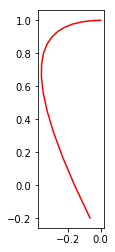

In [159]:
def shiftX(dx,dy,shift):
         found = False
         offset = 0.0
         for (x,y) in zip(dx,dy):
            if not found and y >shift:
                found = True
                offset = x
         dx = dx - offset
         return dx,dy
# 最大径を基準に正規化
x_max_in = np.argmax(samplesX)
maxR = samplesX[x_max_in]#　最大径を出す
#最大径以降のみを抽出
xdata = samplesX[x_max_in:]
ydata = samplesY[x_max_in:]
xdataR = np.array(ydata)/maxR
ydataR= np.array(xdata)/maxR
#xの値を反転させる
xdataR = -xdataR
xdataR,ydataR = shiftX(xdataR,ydataR,1/3)    # y = 1/3 付近が x=0 になるようにデータ全体をｘ軸に沿ってシフト
plt.gca().set_aspect('equal',adjustable='box')
plt.plot(xdataR,ydataR,"r")
xdata_min_in = np.argmin(xdataR)
xdata_min = -xdataR[xdata_min_in]/2

    0:(a,b,err) = (   -0.0017,    0.0000,     0.1307)
  400:(a,b,err) = (   -0.5802,    1.8277,     0.0698)
  800:(a,b,err) = (   -0.4583,    2.3359,     0.0691)
 1200:(a,b,err) = (   -0.3996,    2.6930,     0.0688)
 1600:(a,b,err) = (   -0.3628,    2.9759,     0.0686)
 2000:(a,b,err) = (   -0.3367,    3.2139,     0.0684)
 2400:(a,b,err) = (   -0.3169,    3.4212,     0.0683)
 2800:(a,b,err) = (   -0.3011,    3.6060,     0.0682)
 3200:(a,b,err) = (   -0.2880,    3.7737,     0.0682)
 3600:(a,b,err) = (   -0.2770,    3.9276,     0.0681)
 4000:(a,b,err) = (   -0.2675,    4.0704,     0.0681)


/Users/yumiko/Desktop/folder/fit1.py:64: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


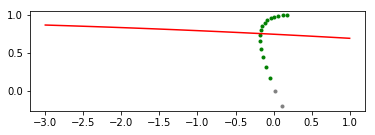

In [160]:
from fit1 import fit1
sentan = fit1((xdataR+xdata_min,ydataR),itr = 4000, alpha=1, xmin=-3, xmax=1,cutoff=0)

# 原因はわからないが，１度目は描画に失敗するようである．２回目はうまくいく．

In [163]:
filename = df.iloc[10]['filename']
filename

'17makoto1o05_l.jpg'

In [29]:
ydataR

array([1.00000000000000, 0.999300037088034, 0.997743689592896,
       0.995221075629174, 0.991623048732551, 0.986842208563645,
       0.980773959937369, 0.973317620177800, 0.964377574798571,
       0.953864481508778, 0.941696522544394, 0.927800705325214,
       0.912114211437305, 0.894585793940977, 0.875177223004265,
       0.853864779861938, 0.830640799100008, 0.805515259265772,
       0.778517421803356, 0.749697518314785, 0.719128486146563,
       0.686907752301772, 0.653159065677688, 0.618034377628907,
       0.581715770855998, 0.544417436619660, 0.506387700280404,
       0.467911095163747, 0.429310484750920, 0.390949233195103,
       0.353233424163159, 0.316614128002897, 0.281589717235851,
       0.248708230375566, 0.218569784071407, 0.191829033577882,
       0.169197681549485, 0.151447035161048, 0.139410611553616],
      dtype=object)

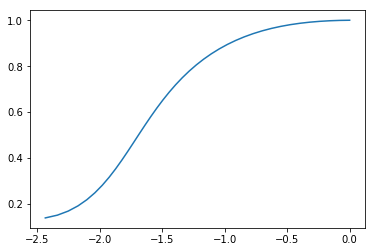

In [26]:
plt.plot(xdataR,ydataR)

In [22]:
xdataR=np.array([-0.93923412, -0.91384941, -0.88846471, -0.86308   , -0.8376953 ,
       -0.81231059, -0.78692588, -0.76154118, -0.73615647, -0.71077177,
       -0.68538706, -0.66000236, -0.63461765, -0.60923294, -0.58384824,
       -0.55846353, -0.53307883, -0.50769412, -0.48230941, -0.45692471,
       -0.43154   , -0.4061553 , -0.38077059, -0.35538588, -0.33000118,
       -0.30461647, -0.27923177, -0.25384706, -0.22846235, -0.20307765,
       -0.17769294, -0.15230824, -0.12692353, -0.10153882, -0.07615412,
       -0.05076941, -0.02538471,  0.        ,  0.02538471,  0.05076941,
        0.07615412,  0.07615412,  0.10153882,  0.12692353,  0.15230824,
        0.15230824,  0.17769294,  0.20307765,  0.22846235,  0.25384706,
        0.25384706,  0.27923177,  0.30461647,  0.33000118,  0.35538588,
        0.38077059,  0.4061553 ,  0.43154   ,  0.45692471,  0.48230941,
        0.50769412,  0.53307883,  0.55846353,  0.58384824,  0.60923294,
        0.63461765,  0.66000236,  0.68538706,  0.71077177,  0.73615647,
        0.76154118,  0.78692588,  0.81231059,  0.8376953 ,  0.86308   ,
        0.88846471,  0.91384941,  0.93923412,  0.96461883,  0.99000353,
        1.01538824,  1.04077294,  1.06615765,  1.09154236,  1.11692706])


In [23]:
ydataR=np.array([0.        , 0.02538471, 0.05076941, 0.05076941, 0.07615412,
       0.07615412, 0.07615412, 0.07615412, 0.07615412, 0.07615412,
       0.07615412, 0.07615412, 0.07615412, 0.07615412, 0.07615412,
       0.07615412, 0.07615412, 0.07615412, 0.07615412, 0.07615412,
       0.10153882, 0.10153882, 0.10153882, 0.10153882, 0.10153882,
       0.10153882, 0.10153882, 0.10153882, 0.10153882, 0.12692353,
       0.12692353, 0.12692353, 0.12692353, 0.15230824, 0.15230824,
       0.15230824, 0.17769294, 0.20307765, 0.20307765, 0.22846235,
       0.25384706, 0.27923177, 0.30461647, 0.33000118, 0.35538588,
       0.38077059, 0.4061553 , 0.43154   , 0.45692471, 0.48230941,
       0.50769412, 0.53307883, 0.55846353, 0.58384824, 0.60923294,
       0.63461765, 0.66000236, 0.68538706, 0.71077177, 0.71077177,
       0.73615647, 0.76154118, 0.78692588, 0.78692588, 0.81231059,
       0.81231059, 0.8376953 , 0.86308   , 0.86308   , 0.88846471,
       0.88846471, 0.91384941, 0.91384941, 0.91384941, 0.93923412,
       0.93923412, 0.93923412, 0.93923412, 0.96461883, 0.96461883,
       0.96461883, 0.96461883, 0.96461883, 0.96461883, 0.96461883])